In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nome=["Cherri","Bernhard","Hana","Francesca","Wren","Aldin","Hersch","Mala","Penny","Jasen"]
genero =["Feminino","Feminino","Feminino","Masculino","Feminino","Masculino","Masculino","Feminino","Masculino","Masculino"]
cidade =["Curitiba","Curitiba","Cascável","Maringá","Indaiatuba","Cascável","Cascável","Curitiba" , "Ponta Grossa","Curitiba" ]
idade =[51,43,56,47,70,37,84,34,66,27]

dataframe = pd.DataFrame({"nome":nome,"genero":genero,"idade":idade,"cidade":cidade})

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,Feminino,51,Curitiba
1,Bernhard,Feminino,43,Curitiba
2,Hana,Feminino,56,Cascável
3,Francesca,Masculino,47,Maringá
4,Wren,Feminino,70,Indaiatuba


In [ ]:
temporario = pd.get_dummies(dataframe[["genero","cidade"]])

In [ ]:
temporario.head(10)

,genero_Feminino,genero_Masculino,cidade_Cascável,cidade_Curitiba,cidade_Indaiatuba,cidade_Maringá,cidade_Ponta Grossa
0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,1,0,1,0,0,0,0
3,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0
5,0,1,1,0,0,0,0
6,0,1,1,0,0,0,0
7,1,0,0,1,0,0,0
8,0,1,0,0,0,0,1
9,0,1,0,1,0,0,0


# Codificação pode contagem e frequência

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,Feminino,51,Curitiba
1,Bernhard,Feminino,43,Curitiba
2,Hana,Feminino,56,Cascável
3,Francesca,Masculino,47,Maringá
4,Wren,Feminino,70,Indaiatuba


In [ ]:
contagem_genero = dataframe["genero"].value_counts().to_dict()

In [ ]:
contagem_genero

{'Feminino': 5, 'Masculino': 5}

In [ ]:
type(dataframe["genero"].value_counts())

pandas.core.series.Series

In [ ]:
contagem_genero

{'Feminino': 5, 'Masculino': 5}

In [ ]:
dataframe["genero"] = dataframe["genero"].map(contagem_genero)

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,5,51,Curitiba
1,Bernhard,5,43,Curitiba
2,Hana,5,56,Cascável
3,Francesca,5,47,Maringá
4,Wren,5,70,Indaiatuba


In [ ]:
def codificacao_contagem(dataframe,coluna):
    aux = dataframe[coluna].value_counts().to_dict()
    coluna_aux = dataframe[coluna].map(aux)

    return coluna_aux

In [ ]:
dataframe["cidade"]=codificacao_contagem(dataframe,"cidade")

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,Feminino,51,4
1,Bernhard,Feminino,43,4
2,Hana,Feminino,56,3
3,Francesca,Masculino,47,1
4,Wren,Feminino,70,1


In [ ]:
def codificacao_frequencia(dataframe,coluna):
    aux = (dataframe[coluna].value_counts()/len(dataframe[coluna])).to_dict()
    coluna_aux = dataframe[coluna].map(aux)

    return coluna_aux

In [ ]:
dataframe["genero"] = codificacao_frequencia(dataframe,"genero")

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,0.5,51,Curitiba
1,Bernhard,0.5,43,Curitiba
2,Hana,0.5,56,Cascável
3,Francesca,0.5,47,Maringá
4,Wren,0.5,70,Indaiatuba


In [ ]:
dataframe["cidade"] = codificacao_frequencia(dataframe,"cidade")

In [ ]:
dataframe.head()

,nome,genero,idade,cidade
0,Cherri,0.5,51,0.4
1,Bernhard,0.5,43,0.4
2,Hana,0.5,56,0.3
3,Francesca,0.5,47,0.1
4,Wren,0.5,70,0.1


## Codificação com inteiros de maneira ordenada

In [ ]:
dataframe = pd.read_csv("e-commerce.csv")

In [ ]:
dataframe.head()

,id,Nome,Idade,Genero,Cidade,Carrinho
0,1,Gipsy,18,Male,Curitiba,329.49
1,2,Auroora,38,Female,Ponta Grossa,950.89
2,3,Ave,43,Male,Toledo,767.51
3,4,Jania,66,Male,Castro,607.22
4,5,Lilith,58,Male,Ponta Grossa,843.26


Text(0, 0.5, 'Carrinho')

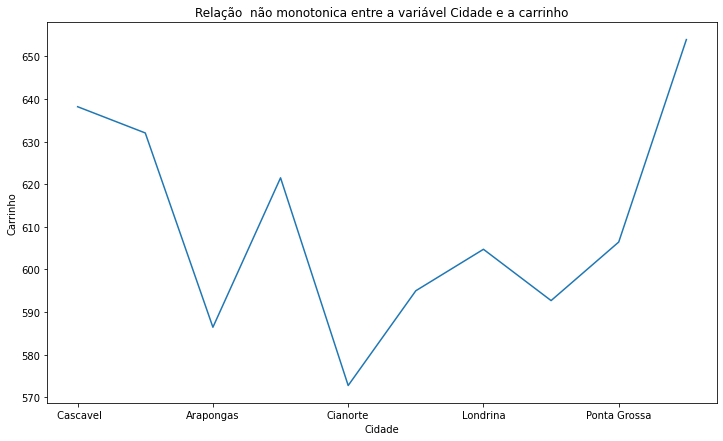

In [ ]:
plt.figure(figsize=(12,7))
dataframe.groupby("Cidade")["Carrinho"].mean().plot()
plt.title("Relação  não monotonica entre a variável Cidade e a carrinho")
plt.ylabel("Carrinho")

In [ ]:
def grafico(dataframe,coluna1,coluna2): 
  plt.figure(figsize=(12,7))
  dataframe.groupby(coluna1)[coluna2].mean().plot()
  texto = f"Relação entre a {coluna1} e a media do {coluna2}"
  plt.title(texto)
  plt.ylabel(coluna2)

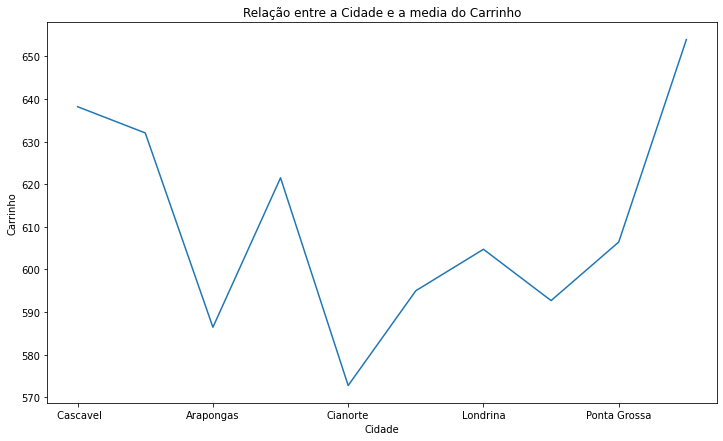

In [ ]:
grafico(dataframe,"Cidade","Carrinho")

In [ ]:
rotulos_ordenados = dataframe.groupby(["Cidade"])["Carrinho"].mean().sort_values().index

In [ ]:
def codificacao_ordenada(dataframe,coluna1,coluna2):
  rotulos_ordenados = dataframe.groupby([coluna1])[coluna2].mean().sort_values().index
  ordinal = {k: i for i, k in enumerate(rotulos_ordenados,0)}
  aux = dataframe[coluna1].map(ordinal)

  return aux

In [ ]:
rotulos_ordenados

Index(['Cianorte', 'Arapongas', 'Piraquara', 'Curitiba', 'Londrina',
       'Ponta Grossa', 'Castro', 'Apucarana', ' Cascavel', 'Toledo'],
      dtype='object', name='Cidade')

In [ ]:
ordinal = {k:i for i, k in enumerate(rotulos_ordenados,0)}
ordinal_mapping = {k: i for i, k in enumerate(rotulos_ordenados, 0)}

In [ ]:
ordinal

{' Cascavel': 8,
 'Apucarana': 7,
 'Arapongas': 1,
 'Castro': 6,
 'Cianorte': 0,
 'Curitiba': 3,
 'Londrina': 4,
 'Piraquara': 2,
 'Ponta Grossa': 5,
 'Toledo': 9}

In [ ]:
dataframe["Cidade"] = dataframe["Cidade"].map(ordinal)

In [ ]:
dataframe.head()

,id,Nome,Idade,Genero,Cidade,Carrinho
0,1,Gipsy,18,Male,3,329.49
1,2,Auroora,38,Female,5,950.89
2,3,Ave,43,Male,9,767.51
3,4,Jania,66,Male,6,607.22
4,5,Lilith,58,Male,5,843.26


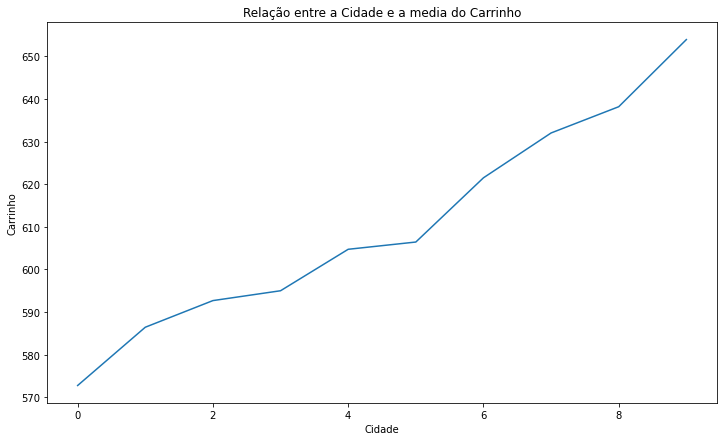

In [ ]:
grafico(dataframe,"Cidade","Carrinho")

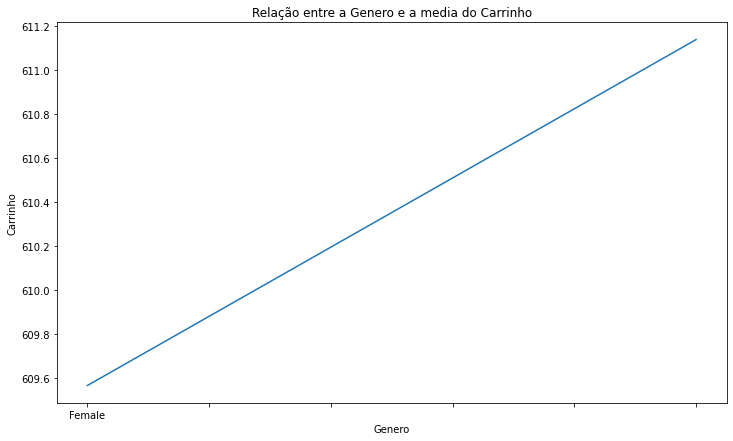

In [ ]:
grafico(dataframe,"Genero", "Carrinho")

In [ ]:
dataframe.head()

,id,Nome,Idade,Genero,Cidade,Carrinho
0,1,Gipsy,18,Male,3,329.49
1,2,Auroora,38,Female,5,950.89
2,3,Ave,43,Male,9,767.51
3,4,Jania,66,Male,6,607.22
4,5,Lilith,58,Male,5,843.26


In [ ]:
dataframe["Genero"] = codificacao_ordenada(dataframe,"Genero","Carrinho")

In [ ]:
dataframe.head()

,id,Nome,Idade,Genero,Cidade,Carrinho
0,1,Gipsy,18,1,3,329.49
1,2,Auroora,38,0,5,950.89
2,3,Ave,43,1,9,767.51
3,4,Jania,66,1,6,607.22
4,5,Lilith,58,1,5,843.26


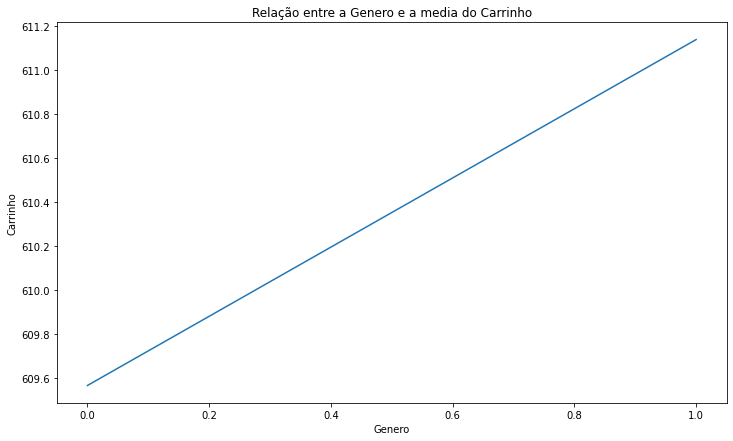

In [ ]:
grafico(dataframe,"Genero","Carrinho")

# Projeto prático

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataframe = pd.read_csv("projeto2.csv")

In [ ]:
dataframe.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


In [ ]:

X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
X_treino.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0.0,19877,78.8500,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0.0,330910,7.8792,Q
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1.0,29103,23.0000,S


In [ ]:
X_teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2.0,CA. 2343,69.5500,S
170,1062,3,"Lithman, Mr. Simon",male,27.0,0,0.0,S.O./P.P. 251,7.5500,S
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0.0,PC 17606,27.4458,C


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(categories= "auto",drop="first", sparse= False)

In [ ]:
ohe.fit(X_treino[["Sex","Embarked"]])

OneHotEncoder(drop='first', sparse=False)

In [ ]:
treino_onehot = ohe.transform(X_treino[["Sex","Embarked"]])
teste_onehot = ohe.transform(X_teste[["Sex","Embarked"]])

In [ ]:
treino_onehot

array([[0., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [ ]:
dataframe["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
!pip install feature-engine

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
ohe_fe = OneHotEncoder(top_categories=None,variables=["Sex","Embarked"],drop_last=True)

In [ ]:
ohe_fe.fit(X_treino)

OneHotEncoder(drop_last=True, variables=['Sex', 'Embarked'])

In [ ]:
treino_ohe_fe = ohe_fe.transform(X_treino)
teste_ohe_fe = ohe_fe.transform(X_teste)

In [ ]:
treino_ohe_fe.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_S,Embarked_Q
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",76.0,1,0.0,19877,78.8500,1,1,0
381,1273,3,"Foley, Mr. Joseph",26.0,0,0.0,330910,7.8792,0,0,1
89,981,2,"Wells, Master. Ralph Lester",2.0,1,1.0,29103,23.0000,0,1,0
233,1125,3,"Linehan, Mr. Michael",27.0,0,0.0,330971,7.8792,0,0,1
191,1083,1,"Salomon, Mr. Abraham L",27.0,0,0.0,111163,26.0000,0,1,0


In [ ]:
teste_ohe_fe.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_S,Embarked_Q
360,1252,3,"Sage, Master. William Henry",14.5,8,2.0,CA. 2343,69.5500,0,1,0
170,1062,3,"Lithman, Mr. Simon",27.0,0,0.0,S.O./P.P. 251,7.5500,0,1,0
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",53.0,0,0.0,PC 17606,27.4458,1,0,0
358,1250,3,"O'Keefe, Mr. Patrick",27.0,0,0.0,368402,7.7500,0,0,1
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",45.0,1,0.0,350026,14.1083,1,1,0


In [ ]:
from feature_engine.encoding import CountFrequencyEncoder

In [ ]:
contagem = CountFrequencyEncoder(encoding_method="count",variables=["Sex","Embarked"])

In [ ]:
contagem.fit(X_treino)

CountFrequencyEncoder(variables=['Sex', 'Embarked'])

In [ ]:
contagem.encoder_dict_

{'Embarked': {'C': 66, 'Q': 32, 'S': 194}, 'Sex': {'female': 95, 'male': 197}}

In [ ]:
treino_contagem = contagem.transform(X_treino)
teste_contagem = contagem.transform(X_teste)

In [ ]:
treino_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",95,76.0,1,0.0,19877,78.8500,194
381,1273,3,"Foley, Mr. Joseph",197,26.0,0,0.0,330910,7.8792,32
89,981,2,"Wells, Master. Ralph Lester",197,2.0,1,1.0,29103,23.0000,194


In [ ]:
teste_contagem.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",197,14.5,8,2.0,CA. 2343,69.5500,194
170,1062,3,"Lithman, Mr. Simon",197,27.0,0,0.0,S.O./P.P. 251,7.5500,194
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",95,53.0,0,0.0,PC 17606,27.4458,66


In [ ]:
frequencia = CountFrequencyEncoder(encoding_method="frequency",variables=["Sex","Embarked"])

In [ ]:
frequencia.fit(X_treino)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['Sex', 'Embarked'])

In [ ]:
frequencia.encoder_dict_

{'Embarked': {'C': 0.22602739726027396,
  'Q': 0.1095890410958904,
  'S': 0.6643835616438356},
 'Sex': {'female': 0.3253424657534247, 'male': 0.6746575342465754}}

In [ ]:
treino_frequencia = frequencia.transform(X_treino)
teste_frequencia = frequencia.transform(X_teste)

In [ ]:
treino_frequencia.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",0.325342,76.0,1,0.0,19877,78.8500,0.664384
381,1273,3,"Foley, Mr. Joseph",0.674658,26.0,0,0.0,330910,7.8792,0.109589
89,981,2,"Wells, Master. Ralph Lester",0.674658,2.0,1,1.0,29103,23.0000,0.664384


In [ ]:
teste_frequencia.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",0.674658,14.5,8,2.0,CA. 2343,69.5500,0.664384
170,1062,3,"Lithman, Mr. Simon",0.674658,27.0,0,0.0,S.O./P.P. 251,7.5500,0.664384
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",0.325342,53.0,0,0.0,PC 17606,27.4458,0.226027


In [ ]:
from feature_engine.encoding import OrdinalEncoder

In [ ]:
ordinal = OrdinalEncoder(encoding_method="ordered", variables=["Sex","Embarked"])

In [ ]:
ordinal.fit(X_treino,y_treino)

OrdinalEncoder(variables=['Sex', 'Embarked'])

In [ ]:
ordinal.encoder_dict_

{'Embarked': {'C': 0, 'Q': 2, 'S': 1}, 'Sex': {'female': 1, 'male': 0}}

In [ ]:
treino_ordinal = ordinal.transform(X_treino)
teste_ordinal = ordinal.transform(X_teste)

In [ ]:
treino_ordinal.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",1,76.0,1,0.0,19877,78.8500,1
381,1273,3,"Foley, Mr. Joseph",0,26.0,0,0.0,330910,7.8792,2
89,981,2,"Wells, Master. Ralph Lester",0,2.0,1,1.0,29103,23.0000,1


In [ ]:
teste_ordinal.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
360,1252,3,"Sage, Master. William Henry",0,14.5,8,2.0,CA. 2343,69.5500,1
170,1062,3,"Lithman, Mr. Simon",0,27.0,0,0.0,S.O./P.P. 251,7.5500,1
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",1,53.0,0,0.0,PC 17606,27.4458,0


In [ ]:
def grafico(dataframe,coluna1,coluna2): 
  plt.figure(figsize=(12,7))
  dataframe.groupby(coluna1)[coluna2].mean().plot()
  texto = f"Relação entre a {coluna1} e a media do {coluna2}"
  plt.title(texto)
  plt.ylabel(coluna2)

In [ ]:
sex_treino = X_treino["Sex"]
embarked_treino = X_treino["Embarked"]

temp = pd.concat([sex_treino,embarked_treino, y_treino], axis=1)

In [ ]:
temp.head()

,Sex,Embarked,Survived
96,female,S,1
381,male,Q,0
89,male,S,0
233,male,Q,0
191,male,S,0


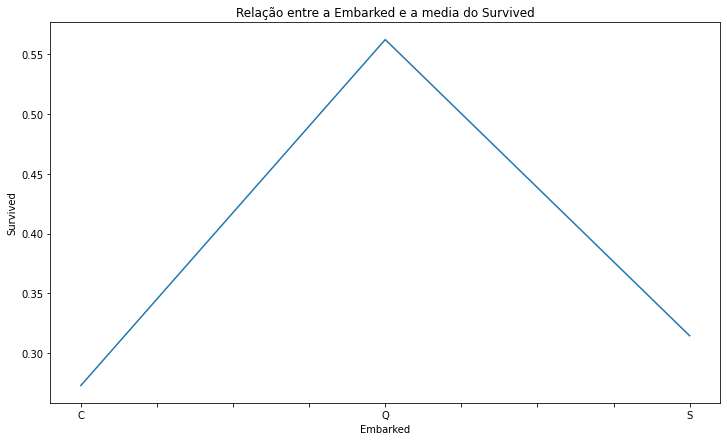

In [ ]:
grafico(temp,"Embarked","Survived")

In [ ]:
def concatena_e_plota(dataframe,alvo,coluna1,coluna2):
    aux1 = dataframe[coluna1]
    aux2 = alvo

    temp = pd.concat([aux1,aux2],axis=1)
    grafico(temp,coluna1,coluna2)

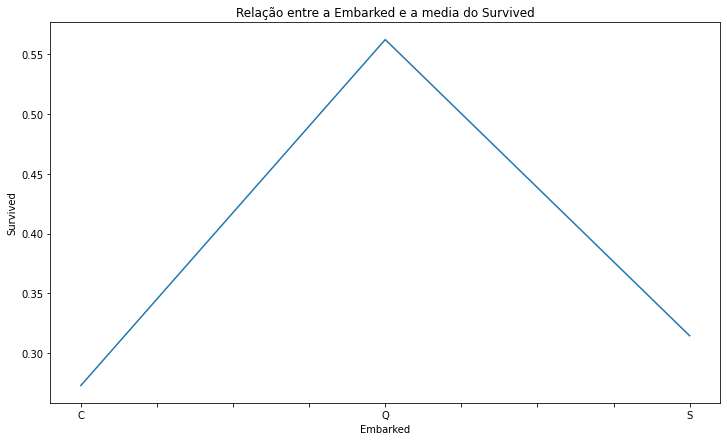

In [ ]:
concatena_e_plota(X_treino,y_treino,"Embarked","Survived")

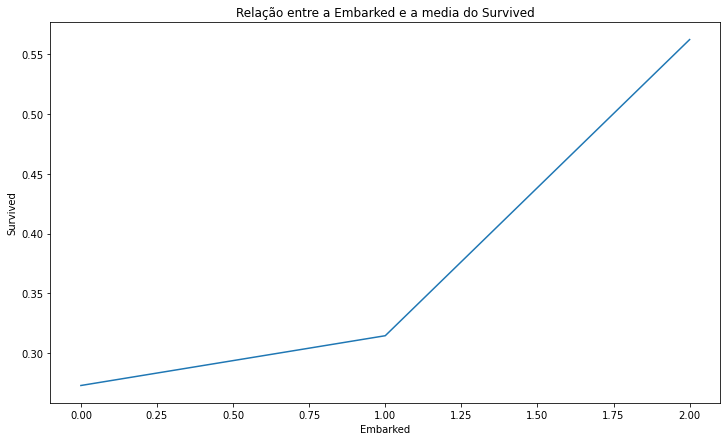

In [ ]:
concatena_e_plota(treino_ordinal,y_treino,"Embarked","Survived")

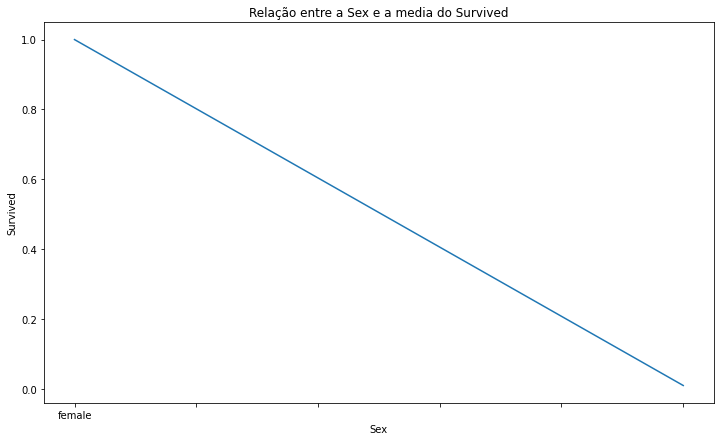

In [ ]:
concatena_e_plota(X_treino,y_treino,"Sex","Survived")

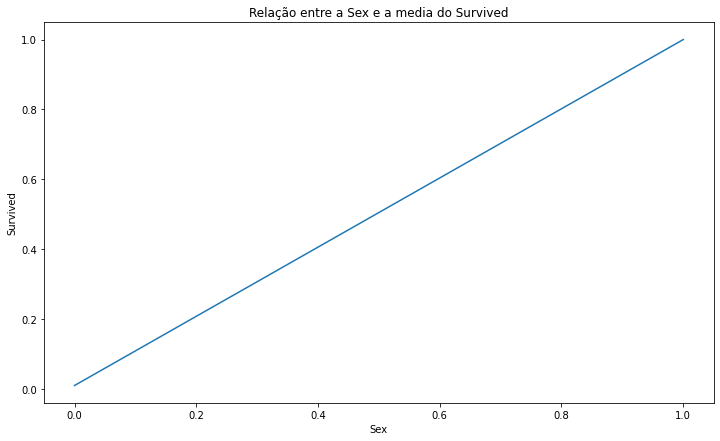

In [ ]:
concatena_e_plota(treino_ordinal,y_treino,"Sex","Survived")

In [ ]:
treino_ordinal

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",1,76.0,1,0.0,19877,78.8500,1
381,1273,3,"Foley, Mr. Joseph",0,26.0,0,0.0,330910,7.8792,2
89,981,2,"Wells, Master. Ralph Lester",0,2.0,1,1.0,29103,23.0000,1
233,1125,3,"Linehan, Mr. Michael",0,27.0,0,0.0,330971,7.8792,2
191,1083,1,"Salomon, Mr. Abraham L",0,27.0,0,0.0,111163,26.0000,1
...,...,...,...,...,...,...,...,...,...,...
323,1215,1,"Rowe, Mr. Alfred G",0,33.0,0,0.0,113790,26.5500,1
192,1084,3,"van Billiard, Master. Walter John",0,11.5,1,1.0,A/5. 851,14.5000,1
117,1009,3,"Sandstrom, Miss. Beatrice Irene",1,1.0,1,1.0,PP 9549,16.7000,1
47,939,3,"Shaughnessy, Mr. Patrick",0,27.0,0,0.0,370374,7.7500,2
